# Boosting Exercise

In this exercise, you will learn about the Boosting technique, which is an ensemble method used to primarily reduce bias, and also variance in supervised learning. It combines multiple weak learners into a single strong learner. The learners are trained sequentially, each trying to correct its predecessor.

## Dataset
We will use the Breast Cancer dataset for this exercise. This dataset contains features computed from digitized images of breast mass and is used to predict whether the mass is malignant or benign. **Feel free to use another dataset!!**

## Task
Your task is to:
1. Load the dataset.
2. Preprocess the data (if necessary).
3. Implement boosting models.
4. Evaluate the models performance.

Please fill in the following code blocks to complete the exercise.

## AdaBoost Tutorial


### Step 1: Import Required Libraries
First, import the necessary libraries for data manipulation, model training, and evaluation.

In [3]:
import pandas as pd
df = pd.read_csv('Dataset/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Step 2: Load and Preprocess the Dataset
Load the dataset and preprocess it. This includes handling missing values, encoding categorical variables, and splitting the data into features and target variables.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [72]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df.sample(30)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
490,91376701,0,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.012610,...,14.170,31.99,92.74,622.9,0.12560,0.18040,0.12300,0.06335,0.3100,0.08203
355,9010258,0,12.560,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.043910,...,13.370,22.43,89.02,547.4,0.10960,0.20020,0.23880,0.09265,0.2121,0.07188
76,8610629,0,13.530,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.065560,...,14.080,12.49,91.36,605.5,0.14510,0.13790,0.08539,0.07407,0.2710,0.07191
506,91544001,0,12.220,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.021660,...,13.160,24.17,85.13,515.3,0.14020,0.23150,0.35350,0.08088,0.2709,0.08839
116,864726,0,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.023080,...,9.414,17.07,63.34,270.0,0.11790,0.18790,0.15440,0.03846,0.1652,0.07722
213,881094802,1,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.065970,...,18.070,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818
395,903811,0,14.060,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.032510,...,14.920,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
542,921644,0,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.030270,...,16.510,32.29,107.40,826.4,0.10600,0.13760,0.16110,0.10950,0.2722,0.06956
188,874662,0,11.810,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.015530,...,12.570,26.48,79.57,489.5,0.13560,0.10000,0.08803,0.04306,0.3200,0.06576
300,892438,1,19.530,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.106200,...,25.930,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929


<Axes: >

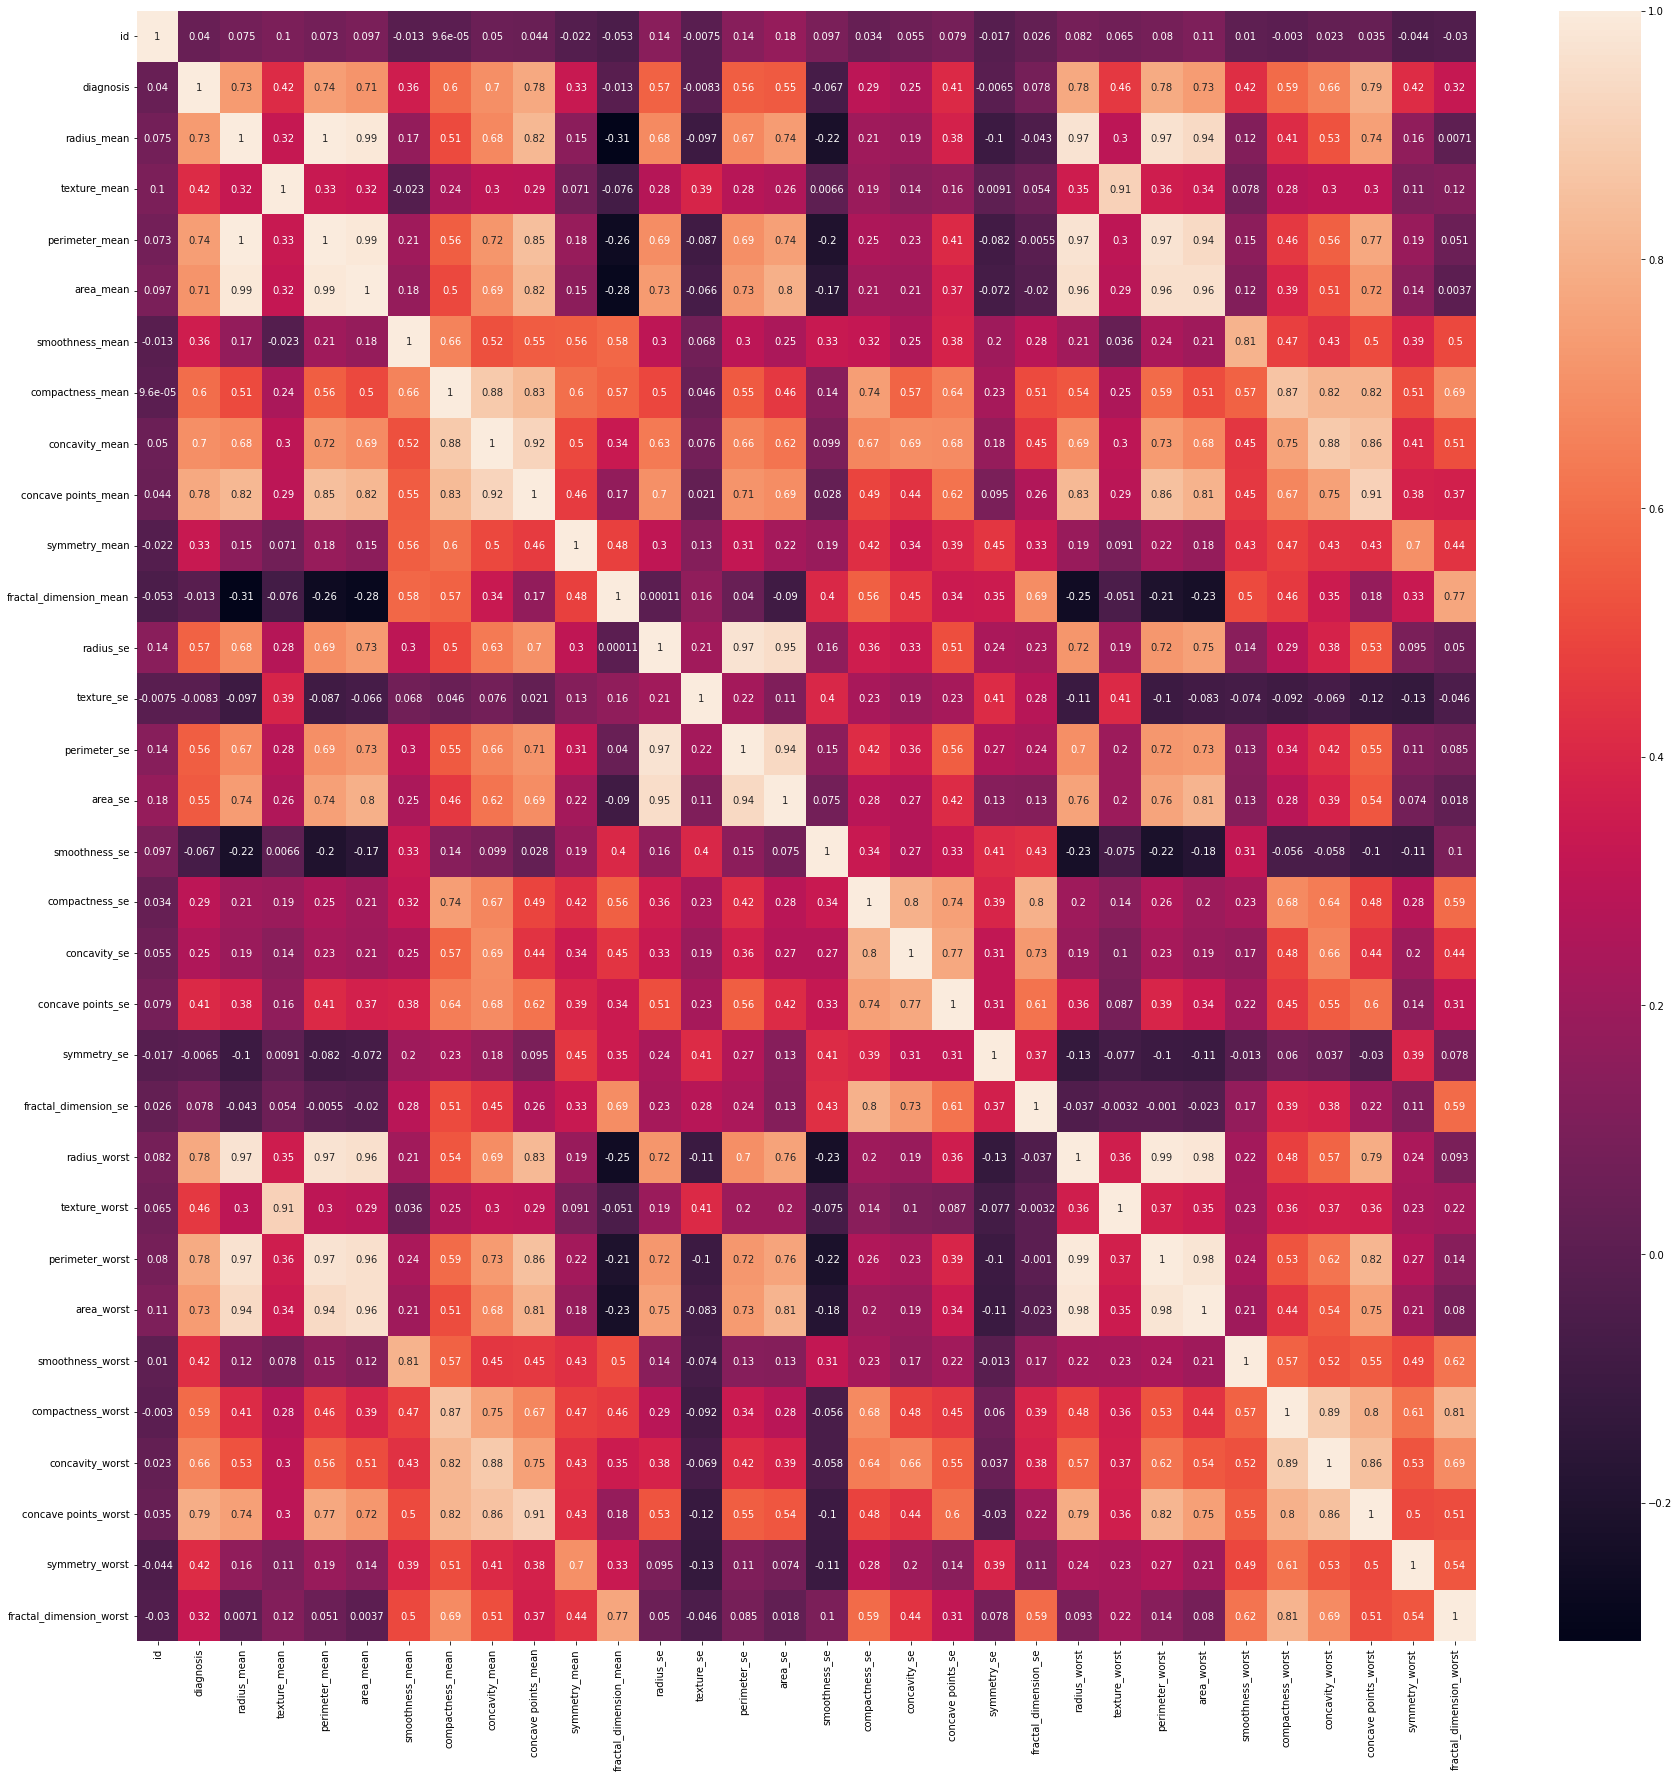

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt 
corr = df.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True)


### Step 3: Split the Dataset
Split the dataset into training and testing sets to evaluate the performance of the models.

In [96]:
from sklearn.model_selection import train_test_split

#x = df[['concave points_worst','fractal_dimension_se','radius_se','perimeter_worst']]
x = X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20 , random_state= 42)
x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Step 4: Initialize and Train the AdaBoost Classifier
Initialize a Decision Tree classifier and use it as the base estimator for the AdaBoost classifier.

In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [98]:
base_estimator = DecisionTreeClassifier()
adaboost = AdaBoostClassifier(base_estimator,n_estimators=50,random_state=42)

In [99]:
adaboost.fit(x_train,y_train)

C:\Users\anees\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

## XGBoost Tutorial


### Step 1: Import Required Libraries
First, import the necessary libraries for data manipulation, model training, and evaluation.

### Step 2: Load and Preprocess the Dataset
Load the dataset and preprocess it. This includes handling missing values, encoding categorical variables, and splitting the data into features and target variables.

### Step 3: Split the Dataset
Split the dataset into training and testing sets to evaluate the performance of the models.

### Step 4: Initialize and Train the XGBoost Classifier
Initialize and train the XGBoost classifier.

## Gradient Boosting Tutorial


### Step 1: Import Required Libraries
First, import the necessary libraries for data manipulation, model training, and evaluation.

### Step 2: Load and Preprocess the Dataset
Load the dataset and preprocess it. This includes handling missing values, encoding categorical variables, and splitting the data into features and target variables.

### Step 3: Split the Dataset
Split the dataset into training and testing sets to evaluate the performance of the models.

### Step 4: Initialize and Train the Gradient Boosting Classifier
Initialize and train the Gradient Boosting classifier.

In [100]:
# Feature selection with Random-Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [102]:
#clf.feature_importances_ = Get the important feature from this model which is fitted with x_train and y_train
#index = x_train.columns = Get the important feature (columns) from the training data 

feature_selection = pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_selection

radius_worst               0.133637
concave points_worst       0.131556
perimeter_worst            0.112187
area_worst                 0.092223
concave points_mean        0.082881
concavity_mean             0.060761
radius_mean                0.046958
area_mean                  0.045417
perimeter_mean             0.038553
area_se                    0.034513
concavity_worst            0.033769
compactness_worst          0.024691
texture_worst              0.021512
texture_mean               0.016646
symmetry_worst             0.014854
perimeter_se               0.014794
smoothness_worst           0.013573
compactness_mean           0.011022
radius_se                  0.010989
texture_se                 0.007387
smoothness_mean            0.006739
symmetry_se                0.006025
fractal_dimension_se       0.005537
concave points_se          0.005364
fractal_dimension_worst    0.004892
compactness_se             0.004819
concavity_se               0.004494
symmetry_mean              0

In [104]:
x = df[['concave points_worst','fractal_dimension_se','radius_se','perimeter_worst']]
y = df['diagnosis']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20 , random_state= 42)

In [105]:
base_estimator = DecisionTreeClassifier()
adaboost = AdaBoostClassifier(base_estimator,n_estimators=50,random_state=42)


adaboost.fit(x_train,y_train)

C:\Users\anees\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [106]:
predict = adaboost.predict(x_test)

In [107]:
predict

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.89      0.95      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

